In [1]:
import pandas as pd
import numpy as np

from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from algo_eff_power import get_eff_power
from algo_eff_speed import get_eff_speed
from algo_effective_wake_effect import get_eff_wake

In [3]:
def plot_turbines(points,ax = None):
    X = points[:,0]
    Y = points[:,1]
    if not ax:
        plt.figure(figsize = (10,8))
        plt.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
        plt.scatter(X,Y,s = 100,marker = '*')    
    else: 
        ax.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
        ax.scatter(X,Y,s = 100,marker = '*')
        
    
def plot_turbines2(list_points,list_aep = None,n = None):
    l = len(list_points)
    fig,ax = plt.subplots(1,l,figsize = (20,8))
    for i,points in enumerate(list_points):
        plot_turbines(points,ax[i])
        if list_aep:
            ax[i].set_title('AEP is '+str(list_aep[i]))
    
    
def plot_turbines3(points,n,title = None):
    plt.figure(figsize = (12,8))
    X = points[:,0]
    Y = points[:,1]
    
    plt.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
    plt.scatter(X,Y,s = 100,marker = '*')
        
    for i, txt in enumerate(n):
        plt.annotate(txt, (X[i], Y[i]))
    
    if not title == None:
        plt.title('AEP is ' + str(title))
    
def plot_turbines4(file,n,title):
    data = pd.read_csv(file)
    array = np.array(data)
    plot_turbines3(array,n,title)
#         print(points)

In [4]:
WIND_DATA = 'wind_data/full_wind_data.csv'
POWER_CURVE = 'power_curve.csv'

turbine_datasets = glob('turbine_data/*.csv')

In [5]:
temp = turbine_datasets[0]

In [6]:
AEP,farm_pwr,total_eff_wake = get_eff_wake(temp,POWER_CURVE,WIND_DATA)

In [7]:
total_eff_wake.shape

(50, 50)

Text(0.5, 1.0, 'Wake effet of i by j')

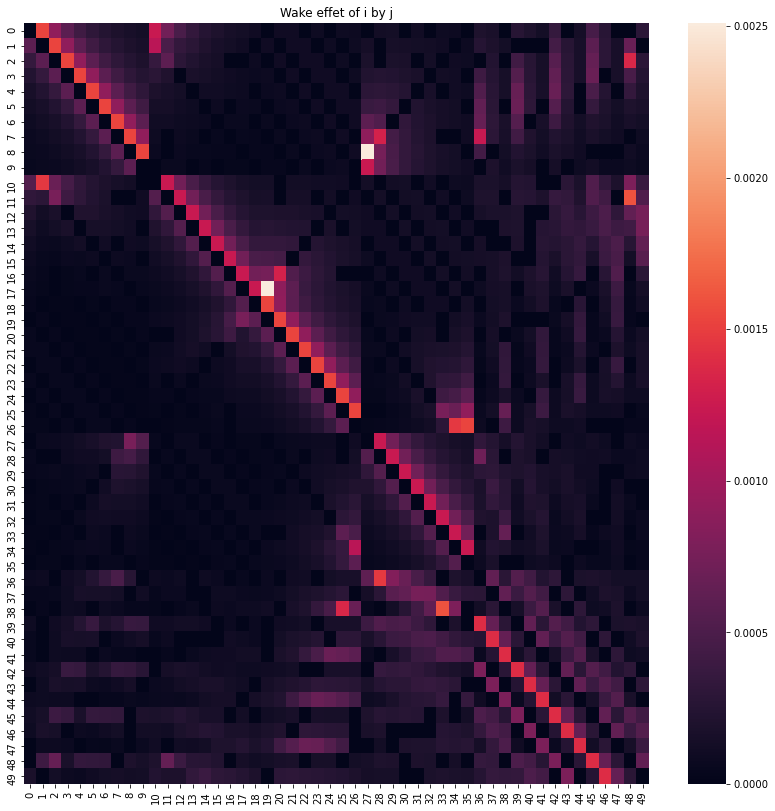

In [8]:
plt.figure(figsize = (14,14))
sns.heatmap(total_eff_wake)
plt.title('Wake effet of i by j')

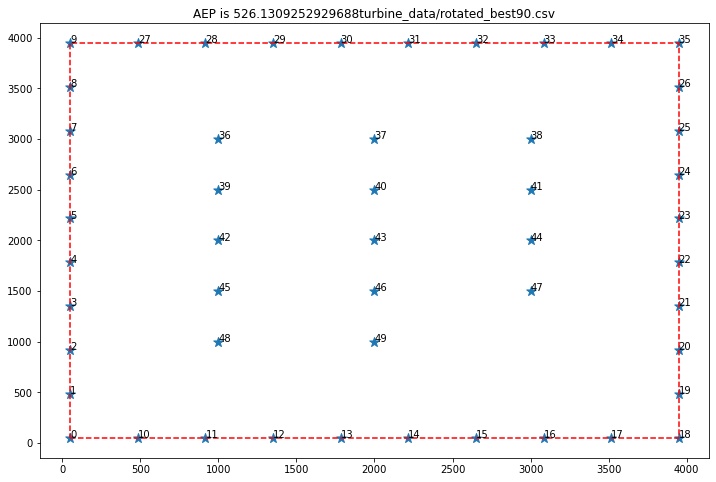

In [9]:
plot_turbines4(temp,np.arange(50),title = str(AEP) + temp )

In [37]:
best_points = ['turbine_data/rotated_best90.csv',
 'turbine_data/rotated_best20.csv',
 'turbine_data/rotated_best80.csv',
 'turbine_data/rotated_best100.csv',
 'turbine_data/rotated_best10.csv',
 'turbine_data/rotated_best0.csv',
 'turbine_data/pattern12.csv']



In [90]:
def visualize_wake_effect(file):
    AEP,farm_pwr,total_eff_wake = get_eff_wake(file,POWER_CURVE,WIND_DATA)
    AEP = AEP
    wake_effect = total_eff_wake 
    print(np.sum(wake_effect))
    plt.figure(figsize = (14,14))
    sns.heatmap(wake_effect)
    plt.title('Wake effet of i by j')

    plot_turbines4(file,np.arange(50),title = str(AEP) + file.split('/')[-1])
    
#     sns.heatmap(farm_pwr)

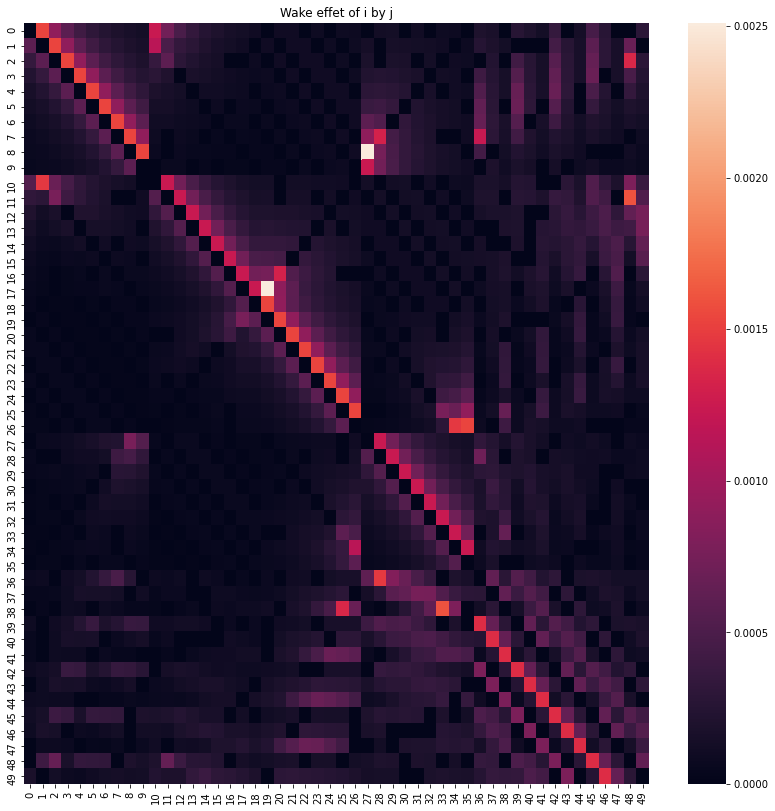

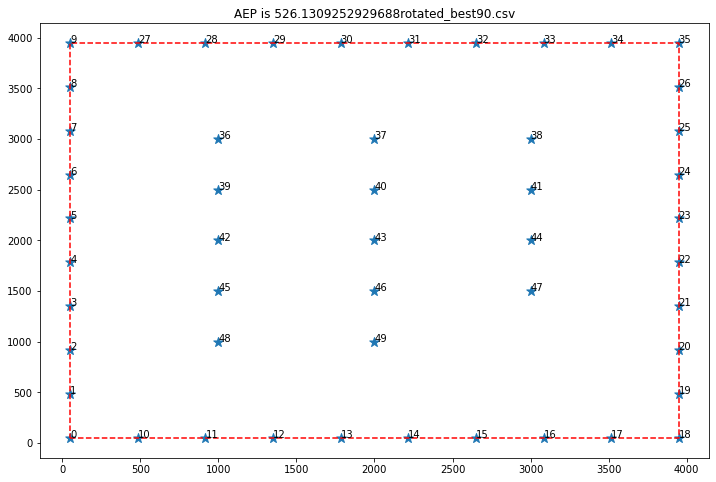

In [42]:
visualize_wake_effect(best_points[0])

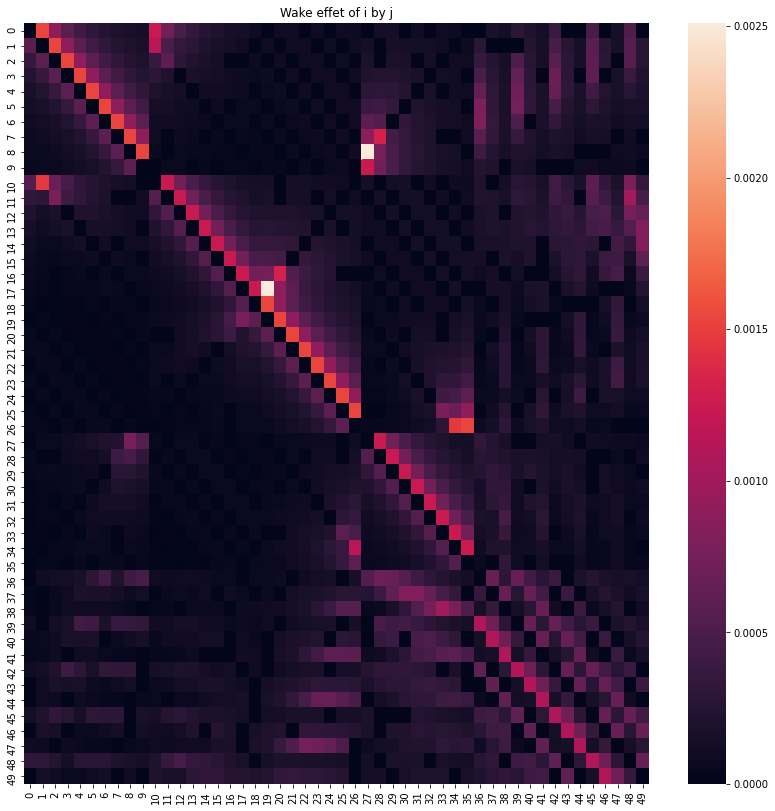

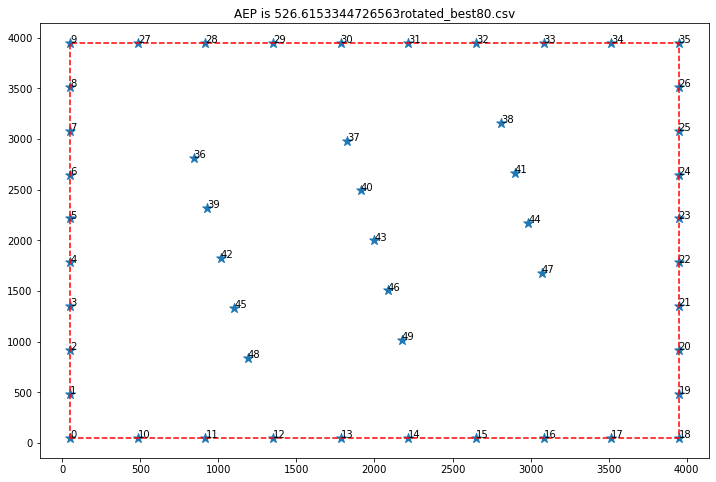

In [43]:
visualize_wake_effect(best_points[2])

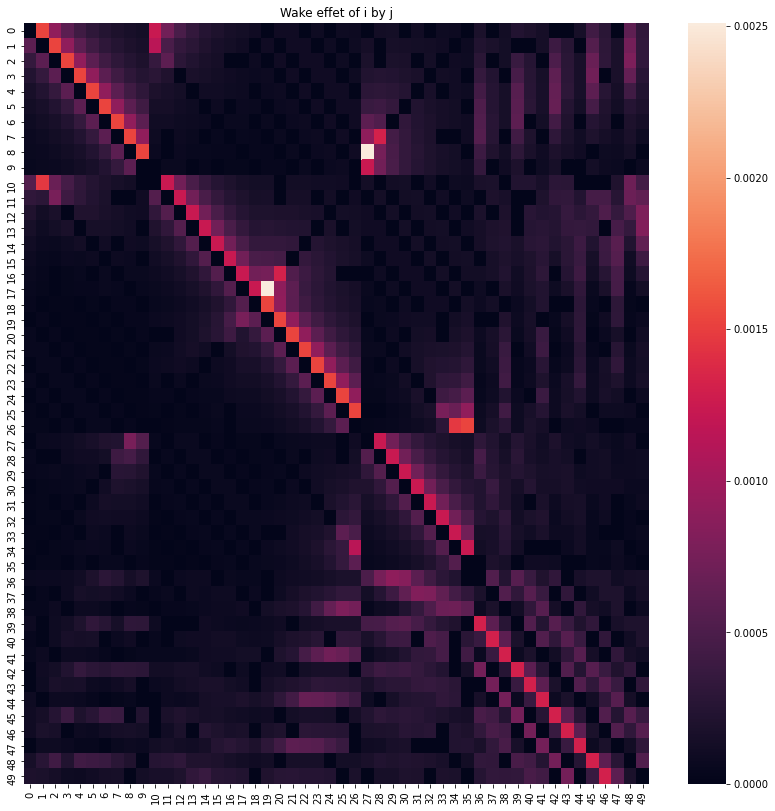

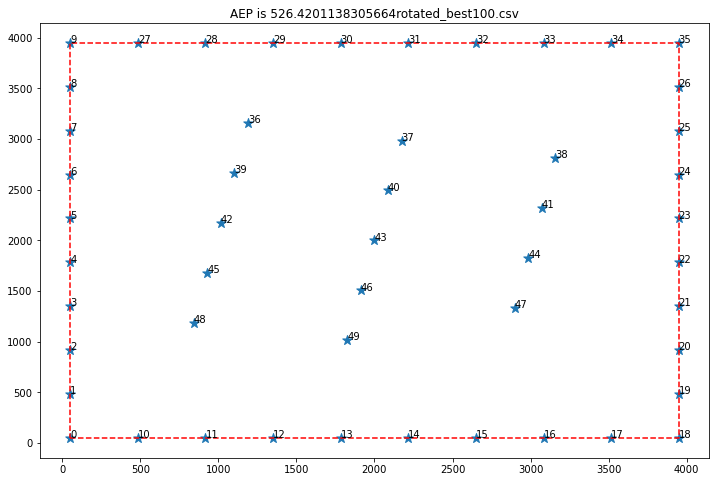

In [44]:
visualize_wake_effect(best_points[3])

# New custom dataset

In [139]:
new_turbine_datasets = glob(r'/home/hardik/shell.ai hackathon/resources/Shell_Hackathon Dataset/new_custom_datasets/*.csv')

In [140]:
new_turbine_datasets

['/home/hardik/shell.ai hackathon/resources/Shell_Hackathon Dataset/new_custom_datasets/rotated_best100.csv',
 '/home/hardik/shell.ai hackathon/resources/Shell_Hackathon Dataset/new_custom_datasets/new_rotated_best200.csv',
 '/home/hardik/shell.ai hackathon/resources/Shell_Hackathon Dataset/new_custom_datasets/rotated_best0.csv']

0.51615536


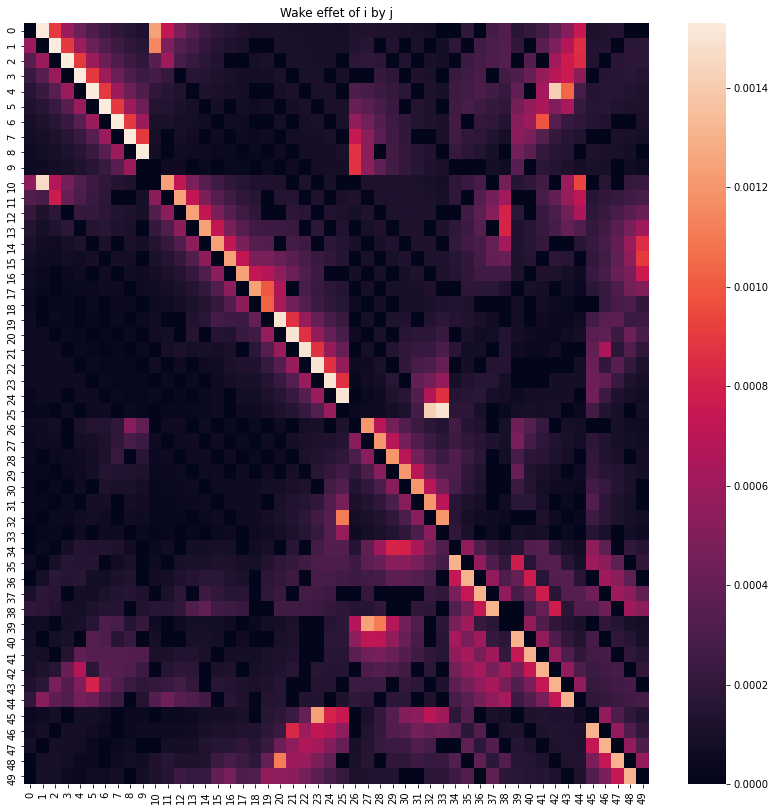

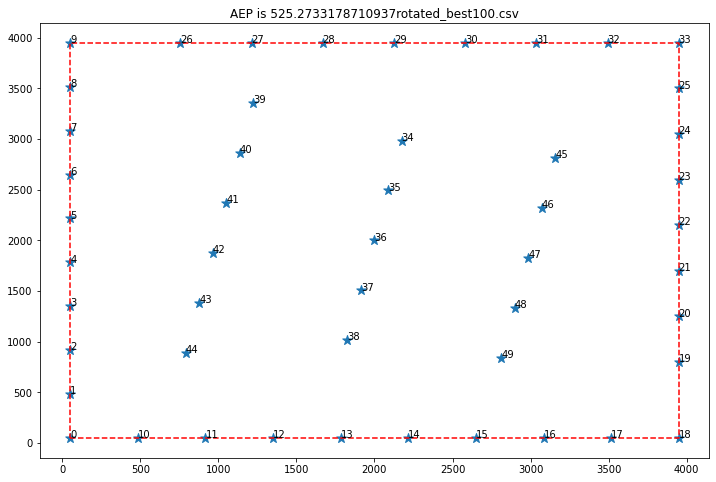

In [141]:
visualize_wake_effect(new_turbine_datasets[0])

0.53298604


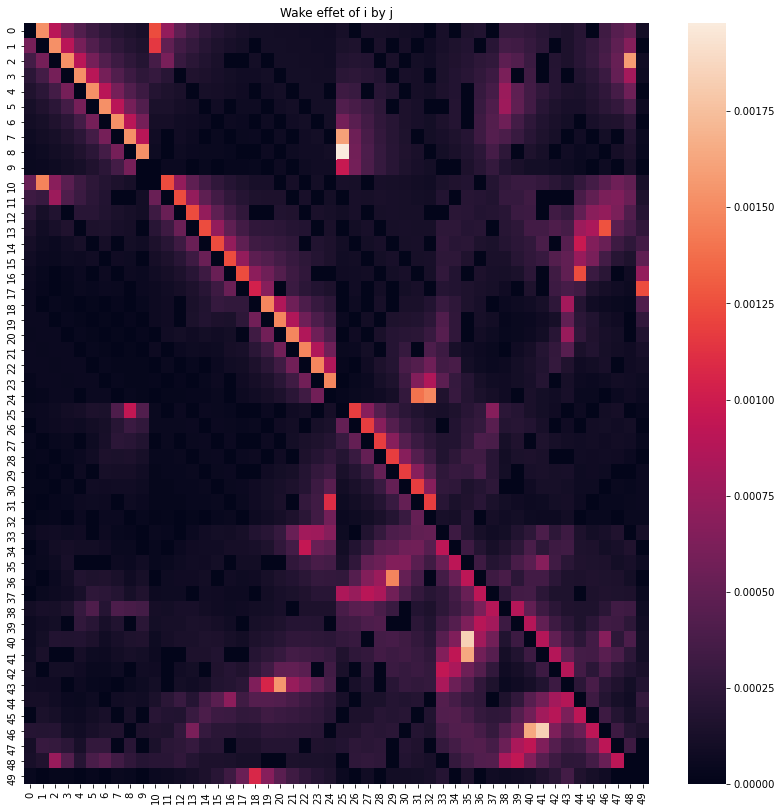

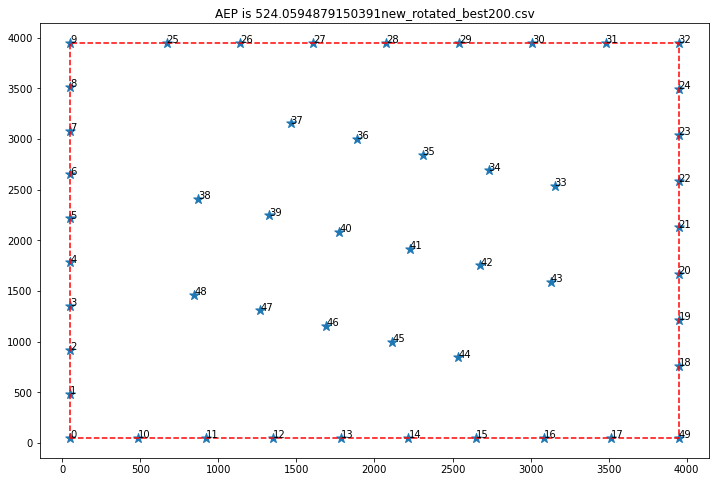

In [105]:
visualize_wake_effect(new_turbine_datasets[1])